<table>
<tr>
<td width=15%><img src="../../img/UGA.png"></img></td>
<td><center><h1>Project n°1</h1></center></td>
<td width=15%><a href="https://team.inria.fr/tripop/team-members/" style="font-size: 16px; font-weight: bold">Florian Vincent</a> </td>
</tr>
</table>

# Basic numerical methods for convex optimization

We will focus on this project in one very interesting problem that arises in multiple topics in data sciences: convex optimization and numerical methods.

This project is adapted for students who wish to strengthen their understanding of the numpy library, and who prefer more math-leaning questions.

## Overlook on the topic

The main question is to minimize or maximize a given scalar function of one or multiple parameters.
In litterature, minimization problems are studied very frequently so we shall have a closer look at their mathematical expression:

Let a parameter $\theta$ represent the parameters of the function we wish to minimize, living in its space denoted $\Theta$. This function is usually called a "loss function", so we denote it by:
$$
\begin{array}{rlcl}L:&\Theta\subseteq\mathbb{R}^n &\to &\mathbb{R}\\ &\theta &\to & L(\theta)\end{array}
$$
Thus the problem writes:
$$
\min_{\theta\in\Theta}L(\theta)
$$

Some mathematical background teaches us that this minimization problem may have either one, multiple, or no feasible solutions.

__Examples__:
* For $L(\theta):=\theta$ with $\theta\in\mathbb{R}$ we have no feasible solution.
* For $L(\theta):=\theta^2-\theta$ with $\theta\in\mathbb{R}$ we have one feasible optimal solution for $\hat{\theta}=\frac{1}{2}$
* For $L(\theta):=3\cos(2\pi\theta)+2$ with $\theta\in\mathbb{R}$ we have an infinity of optimal solutions $\hat{\theta}_k=k+\frac{1}{2}$ $\forall k\in\mathbb{Z}$.
The main point is that when $L$ is strictly convex their must be at most one solution to the problem, which simplifies tremendously the research of $\theta$.

---

Multiple methods have been invented to solve the problem described earlier, depending on the conditions of optimization of the function as well as its shape and regularity.
We will study four methods in increasing order of difficulty of implementation:
* The classical "gradient descent" method. It is very general and easy to implement.
* The second order methods like the Newton algorithm, and its most well known cousin the BFGS method.
* The stochastic optimisation methods, and its most trending one in machine learning: the Adam algorithm.

Everything studied here is related to differentiable scalar-valued functions.

## Applications of this topic

What you will learn about in this project is the foundation of multiple domains of data sciences:
* Most obvious of all: machne learning in which the Adam algorithm is a center piece.
* Operational research in which the constraints $\Theta$ play an extra important role.
* Finance which relies on stochastic problems very often formulated as optimisation problems.
* Physics in which computation of minimal action can lead to surprisingly difficult optimisation formulations.
* Statistics questions like the research of _Maximum a-posteriori_ (MAP) estimators, or _Maximum Likelihood Estimation_ (MLE)

## Code and objectives

This project needs to be done using python, and the numpy library as much as possible.

In [1]:
import numpy as np

You will answer the questions by writting code and writing markdown comments to help your teaching staff see if every notion is well understood.
Please note that the Jupyter notebook is only useful to __prototype the code__, not to write it all.
Your report should contain this notebook, with a minimal amount of code added, and several python files containing the functions and classes you will make, that you can import in the notebook.
Writting `class` and `def` statements in this notebook should be avoided as much as possible.

This project is formulated such that you can use object-oriented programming (OOP) to answer the questions.
This way, every question leads to the creation of a class that needs to be instanciated and properly commented.

We will optimize at each exercise a function deriving by inheritance from the following class:

In [2]:
from baseloss import LossFunction

The optimisation procedures that you will write should inherit as well from its own base class:

In [3]:
from baseoptimizer import Optimizer

### Exercise 1

The main algorithm for the optimisation of convex functions is called gradient descent.
Its main idea is to use the taylor expansion of the function at a starting point and to try and find a "local" best guess for the next one.
Say one is evaluating the loss at the point $\theta_0$ and wishes to find locally (and at order 1) the best theta to go to around them, they may write for all directions $\vec{p}$ somewhat keeping us close to $\theta_0$:
$$
L(\theta_0+\vec{p}) = L(\theta_0) + \left<\vec{p} | \nabla L(\theta_0)\right> + \mathcal{O}(\|\vec{p}\|^2)
$$
(writting $<\cdot |\cdot>$ the scalar product between two vectors and $\|\cdot\|$ the euclidian norm, and $\nabla$ the vector containing the partial derivatives of $L$ with respect to its parameters).

Minimizing locally (i.e. forgetting purposefuly about the remainder $\mathcal{O}(\|\vec{p}\|^2)$), we can make a clever choice of $\vec{p}$:
$$
p:=-\eta\nabla L(\theta_0)
$$
with $\eta$ very small against $\nabla L(\theta_0)$. This way the expansion writes:
$$
L(\theta_0-\eta\nabla L(\theta_0)) = L(\theta_0) + \left<-\eta\nabla L(\theta_0) | \nabla L(\theta_0)\right> + \mathcal{O}(\|\eta\nabla L(\theta_0)\|^2) = L(\theta_0) - \eta\|\nabla L(\theta_0)\|^2+\|\nabla L(\theta_0)\|^2\mathcal{O}(\eta^2)
$$
If $\eta$ is small enough, $\mathcal{O}(\eta^2)$ should be significantly smaller than $\eta$, hence $(\eta-\mathcal{O}(\eta^2))\|\nabla L(\theta_0)\|^2$ should be positive.
We conclude that we have performed a descent since $L(\theta_0-\eta\nabla L(\theta_0)) < L(\theta_0)$ !
This yields the algorithm of the gradient descent :
```
Start at theta := theta_0
While no convergence is observed:
    set theta_new := theta - eta * gradient_oracle(L, theta)
    forget theta, set theta := theta_new
```

**Implement gradient descent in a class called `GradientDescent`, performing on its internal parameter $\theta$ the update described above for the function `function1` (suppose it is a convex function) starting at $\theta_0:=\vec{0}$. Study different values of $\eta$, comment**. 

Voici un exemple de résultat que l'on peut obtenir pour la méthode GradientDescent pour n = 10.

In [4]:
from utils import make_random_func1, make_random_func2
from projet1 import gradient_descent, gradient_descent_1
n = 10
function1 = make_random_func1(10)

In [5]:
print("GradientDescent :")
res = gradient_descent(eps = 0.001, theta0 = np.array([0 for _ in range(n)]), L=function1, eta = 0.01)
print(res)

GradientDescent :
Nombre d'étapes : 327
(array([-4.44592094e-01, -1.26569492e+00, -3.81120922e-01,  1.43870830e-03,
        5.02051128e-01,  1.48296317e+00, -2.12660095e-02,  1.47092469e+00,
       -1.22114362e+00,  5.75651537e-01]), 327)


On peut regarder ce qu'il se passe en fonction des variations des paramètres eta et epsilon.

Le paramètre eta représente la taille du pas que l'on effectue, si eta est grand on avance beaucoup dans la direction du gradient.

In [6]:
# nombre d'etapes pour diffenrets eta avec la fonction GradientDescent
eta_values = [0.01,0.1,1]
for i in eta_values:
    result = gradient_descent(eps = 0.001, theta0 = np.array([0 for _ in range(n)]), L=function1, eta = i)

Nombre d'étapes : 327
Nombre d'étapes : 54
Nombre d'étapes : 7


Commentaire

Le paramètre epsilon est notre condition de convergence. L'algorithme s'arrête lorsque la distance entre la dernière solution calculée et celle d'avant est suffisament petite.

In [7]:
# nombre d'etapes pour diffenrets eps avec la fonction GradientDescent
eps_values = [0.001,0.01,0.1,1]
for i in eps_values:
    result = gradient_descent(eps = i, theta0 = np.array([0 for _ in range(n)]), L=function1, eta = 0.1)

Nombre d'étapes : 54
Nombre d'étapes : 33
Nombre d'étapes : 13
Nombre d'étapes : 2


Commentaire

### Exercise 2

Closely related to the standard gradient descent, many have studied variation of the algorithm to account for more informations on the loss.

So-called Newton methods arise when one tries to expend the Taylor expansion above to more terms:
$$
L(\theta_0+\vec{p})=L(\theta_0)+\left<\vec{p}|\nabla L(\theta_0)\right> + \frac{1}{2!}\left<\vec{p}|\nabla^2L(\theta_0)\vec{p}\right> + \mathcal{O}(\|\vec{p}\|^3)
$$
where $\nabla^2$ denotes the hessian of the loss, i.e. its second order derivatives.
Note that since we study a scalar-valued loss, the gradient is a vector and the hessian is a matrix.

To solve this, the Newton method uses the information from the hessian by updating $\vec{p}$ with the inverse of the hessian:
$$
\vec{p}:=-\eta\nabla^{\textbf{-2}}L(\theta_0)\nabla L(\theta_0)
$$
This formula stems from the local minimization of the Taylor expansion. To see that, take the gradient of the top equation with respect to $\vec{p}$ and make it null (this is a classical optimality condition result, the minimum is achieved where the gradient is null):
$$
\begin{array}{ll}&\nabla L(\theta_0)+\nabla^2L(\theta_0)\vec{p}=\vec{0}\\ \therefore & \vec{p}:=-\nabla^{\textbf{-2}}L(\theta_0)\nabla L(\theta_0)\end{array}
$$
Notice how the "learning rate" has disapeared and the inverse hessian somehow "took its place".

**Implement the Newton method as `NewtonDescentNaive` starting at $\theta_0:=\vec{0}$, using the `hessian_oracle` method of `function2` (suppose it is a convex twice-differentiable function) to get its hessian. You will use the invert of the hessian, noted $\nabla^{-2}L$ in the above equation, to perform the step.**

Remarque : On suppose que la fonction est strictement convexe pour garantir le fait que la matrice hessienne soit définie positive et donc inversible. Dans le cas contraire, la hessienne admet une valeur propre nulle et n'est donc pas inversible (elle est semi définie positive).

In [8]:
from projet1 import newton_descent_naive, newton_descent_naive_1
n=10
function2 = make_random_func1(n)

In [9]:
print("NewtonNaive :")
res = newton_descent_naive(eps = 0.001, theta0 = np.array([0 for _ in range(n)]), L=function2,eta=0.01)
print(res)

NewtonNaive :
Nombre d'étapes : 367
(array([ 1.42571393,  0.4687005 , -1.41730376, -1.07330667,  1.49146178,
        1.0912353 , -0.02798016,  0.93994944, -0.55993479,  2.1113725 ]), 367)


De nouveau, on peut regarder ce qu'il se passe en fonction des paramètres epsilon et eta.

In [10]:
eta_values = [0.001,0.01,0.1,1]
for i in eta_values:
    result = newton_descent_naive(eps = 0.0001, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=i)

Nombre d'étapes : 3398
Nombre d'étapes : 570
Nombre d'étapes : 78
Nombre d'étapes : 3


Commentaire 

In [11]:
eps_values = [0.00001,0.0001,0.001,0.01,0.1,1,10]
for i in eps_values:
    result = newton_descent_naive(eps = i, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=0.1)

Nombre d'étapes : 100
Nombre d'étapes : 78
Nombre d'étapes : 57
Nombre d'étapes : 35
Nombre d'étapes : 13
Nombre d'étapes : 2
Nombre d'étapes : 2


Commentaire

**Try to make a new version of this solver, `NewtonDescentClever`, which solves the linear system of equations $-\eta\nabla^2L(\theta_0)\vec{p}=\nabla L(\theta_0)$ at each step.
Measure the difference in computing time on `function3`.
How many iterations does it need?
Knowing that the mystery function that you optimize is $L(\theta)=\frac{1}{2}\theta^TA\theta+b\theta$ with $A$ an spd matrixKnowing that the mystery function that you optimize is $L(\theta)=\frac{1}{2}\theta^TA\theta+b\theta$ with $A$ an spd matrix, can you explain this performance? Would it be the same for another function?**, can you explain this performance? Would it be the same for another function?**

In [12]:
from projet1 import newton_descent_clever
n=10
function3 = make_random_func1(n)

In [13]:
print("DescentClever :")
res = newton_descent_clever(theta0 = np.array([0 for _ in range(n)]), L=function3)
print(res)

DescentClever :
[ 1.42653291 -0.96735556  1.27490557  2.75115721 -1.42342978 -0.05041422
 -0.82264027  0.62469794 -0.32640876  0.16197279]


Cette méthode ne nécessite qu'une seule itération, on calcule en une seule fois le résultat. Cette performance est liée à la forme spécifique de la fonction que l'on cherche à optimiser.

<img src="latex.png">

### Exercise 3

Usualy, the hessian itself is not available to the user, so one may wish to find good approximates for Newton methods.
This yields so-called Quasi-Newton methods.

The most used are all the BFGS methods (standing for "Broyden–Fletcher–Goldfarb–Shanno").

The main idea is to update the estimation of the inverse hessian by a low-rank matrix (it should span few dimensions, here 2).

This update matrix is described as a weighted sum of:
* a projector for the change of gradient $y:=\nabla L(\theta_1) - \nabla L(\theta_0)$ which as a rank-one matrix is proportional to $yy^T$
* a projector for the Newtonian system of equations $s_b:=\nabla^{-2}L(\theta_1)(\theta_1-\theta_0)$ which as a rank-one matrix is proportional to $s_bs_b^T$. We note $s_b=\nabla^{-2}L(\theta_1)s$ with $s$ the change of parameters.

The update rule then writes, for $B$ a local approximation of $\nabla^{-2}L$, noting the outer product $a\otimes b:=ab^T$ for vectors:
$$
B_k = B_{k-1} + \frac{y\otimes y}{<y|s>} - \frac{s_b\otimes s_b}{<s|s_b>}
$$

The advantage is that the algorithm does not need to invert a full rank system.

Here is the algorithm:
```
Start at:
    theta := theta_0
    B := Id
    grad := gradient_oracle(theta_0)
Perform a normal gradient step on theta

While no convergence observed:
    Set grad_new at gradient_oracle(theta)
    Set theta_new to theta - eta * matrix_product( B , grad )
    Compute s = theta_new - theta
    Compute y = grad_new - grad
    Set B_new = B + outer( y , y ) / inner( y , s ) - outer( Bs , Bs ) / inner( s , Bs )
    Forget last B, y, s, theta and grad 
```

**Implement the BFGS algorithm in a new `BfgsDescent` class, and test it on the function `function4`. Warning: do NOT use the hessian oracle.**

In [14]:
from projet1 import bfgs_descent, bfgs_descent_1
n=10
function4 = make_random_func1(n)

In [15]:
bfgs_descent(eps=1, theta0=np.array([0 for _ in range(n)]), L=function4, eta=0.01)
# Remarque : on ne doit pas prendre un epsilon trop petit parce que sinon s et y sont très proches de 0 ce qui amène à des erreurs.

Nombre d'étapes : 2


array([-0.00671165, -0.00179162,  0.00010596,  0.00626175, -0.00568693,
       -0.00172782,  0.00146467, -0.00646719, -0.00236315, -0.00953449])

Comparaison pour différents eta

In [16]:
# nombre d'etapes pour diffenrets eta avec la fonction BfgsDescent
eta_values = [0.001,0.01,0.1,1,5,10]
for i in eta_values:
    bfgs_descent(eps=0.0001, theta0=np.array([0 for _ in range(n)]), L=function1, eta=i)

Nombre d'étapes : 15
Nombre d'étapes : 39
Nombre d'étapes : 22
Nombre d'étapes : 26
Nombre d'étapes : 27
Nombre d'étapes : 26


C:\Users\garan\Lib\site-packages\numpy\_core\numeric.py:971: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\garan\ProjetsMaster\ProjetsPython\Introduction-to-Python-for-Data-Sciences\projects\Group_1\projet1.py:124: RuntimeWarning: invalid value encountered in divide
  B += (np.outer(y, y) / np.dot(y, s)) - (np.outer(Bs, Bs) / np.dot(s, Bs))
C:\Users\garan\ProjetsMaster\ProjetsPython\Introduction-to-Python-for-Data-Sciences\projects\Group_1\functions.py:17: RuntimeWarning: invalid value encountered in matmul
  return self.A @ theta + self.b


Commentaire

Comparaison pour différents epsilon

In [17]:
# nombre d'etapes pour diffenrets eps avec la fonction BfgsDescent
eps_values = [0.000000001,0.001,0.01,0.1,1,10]
for i in eps_values:
    result = bfgs_descent(eps=i, theta0=np.array([0 for _ in range(n)]), L=function1, eta=0.1)

Nombre d'étapes : 42
Nombre d'étapes : 22
Nombre d'étapes : 18
Nombre d'étapes : 14
Nombre d'étapes : 2
Nombre d'étapes : 2


Commentaire 

### Comparaison des modèles
Nous allons maintenant regroupes les résultats des 3 exercices précédents

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import random

L'effet du choix d'eta pour les trois méthodes

In [19]:
# esp = 0.0001
tableau1 = pd.DataFrame(
    {'eta':["10","5","1","0.1","0.01","0.001"],
     'GrandientDescent':[300,447,92,10,721,4981],
     'NewtonDescentNaive':[325,514,3,74,521,2910],
     'BfgsDescent':[28,28,28,64,494,2783]})
tableau1

,eta,GrandientDescent,NewtonDescentNaive,BfgsDescent
0,10,300,325,28
1,5,447,514,28
2,1,92,3,28
3,0.1,10,74,64
4,0.01,721,521,494
5,0.001,4981,2910,2783


C:\Users\garan\Lib\site-packages\numpy\_core\numeric.py:971: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\garan\ProjetsMaster\ProjetsPython\Introduction-to-Python-for-Data-Sciences\projects\Group_1\projet1.py:148: RuntimeWarning: invalid value encountered in divide
  B += (np.outer(y, y) / np.dot(y, s)) - (np.outer(Bs, Bs) / np.dot(s, Bs))


<function matplotlib.pyplot.show(close=None, block=None)>

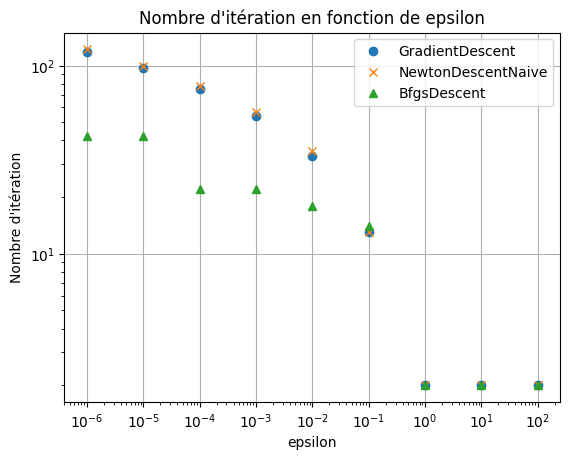

In [20]:
vector = [100,10,1,.1,.01,.001,.0001,.00001,.000001]
epsGD = []
epsNDN = []
epsBD = []
for i in vector:
    epsGD.append(gradient_descent_1(eps=i, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=0.1))
    epsNDN.append(newton_descent_naive_1(eps=i, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=0.1))
    epsBD.append(bfgs_descent_1(eps=i, theta0=np.array([0 for _ in range(10)]), L=function1, eta=0.1))

plt.plot(vector,epsGD,'o',label="GradientDescent")
plt.plot(vector,epsNDN,'x',label="NewtonDescentNaive")
plt.plot(vector,epsBD,'^', label="BfgsDescent")
plt.yscale('log')
plt.xscale('log')

plt.title("Nombre d'itération en fonction de epsilon")
plt.xlabel("epsilon")
plt.ylabel("Nombre d'itération")
plt.legend()
plt.grid(True)
plt.show

L'effet du choix d'epsilon sur les trois méthodes

In [21]:
# esp = 0.0001
tableau2 = pd.DataFrame(
    {'eps':["10","1","0.1","0.01","0.001","0.0001"],
     'GrandientDescent':[2,2,8,30,50,92],
     'NewtonDescentNaive':[2,2,8,30,52,96],
     'BfgsDescent':[2,2,9,27,45,83]})
tableau2

,eps,GrandientDescent,NewtonDescentNaive,BfgsDescent
0,10,2,2,2
1,1,2,2,2
2,0.1,8,8,9
3,0.01,30,30,27
4,0.001,50,52,45
5,0.0001,92,96,83


C:\Users\garan\Lib\site-packages\numpy\_core\numeric.py:971: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\garan\ProjetsMaster\ProjetsPython\Introduction-to-Python-for-Data-Sciences\projects\Group_1\projet1.py:148: RuntimeWarning: invalid value encountered in divide
  B += (np.outer(y, y) / np.dot(y, s)) - (np.outer(Bs, Bs) / np.dot(s, Bs))


<function matplotlib.pyplot.show(close=None, block=None)>

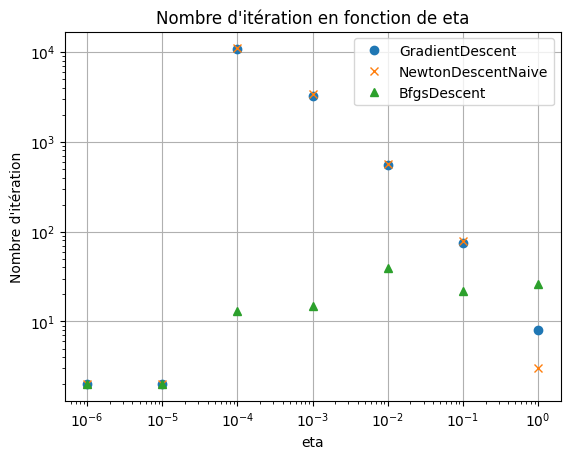

In [22]:
vector = [1,.1,.01,.001,.0001,.00001,.000001]
etaGD = []
etaNDN = []
etaBD = []
for i in vector:
    etaGD.append(gradient_descent_1(eps=0.0001, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=i))
    etaNDN.append(newton_descent_naive_1(eps=0.0001, theta0 = np.array([0 for _ in range(n)]), L=function1, eta=i))
    etaBD.append(bfgs_descent_1(eps=0.0001, theta0=np.array([0 for _ in range(10)]), L=function1, eta=i))

plt.plot(vector,etaGD,'o',label="GradientDescent")
plt.plot(vector,etaNDN,'x',label="NewtonDescentNaive")
plt.plot(vector,etaBD,'^', label="BfgsDescent")
plt.yscale('log')
plt.xscale('log')

plt.title("Nombre d'itération en fonction de eta")
plt.xlabel("eta")
plt.ylabel("Nombre d'itération")
plt.legend()
plt.grid(True)
plt.show

### Exercise 4

To close the loop, we will study a significantly different kind of problem: the stochastic optimisation.

They are way more frequent than deterministic algorithms since a lot of real world applications tackle with the randomness of some data experiments.
They are formulated as follows:
$$
\min_{\theta\in\Theta}\underbrace{\mathbb{E}_{X\sim\mathbb{P}}\left[J_\theta(X)\right]}_{:=L(\theta)}
$$

We suppose that in a general case, $X$ being observed data vectors, we lack an access to the real data distribution $\mathbb{P}$.
So we cannot sample arbitrarily from $P$ and must design clever algorithm that take care of the complexity of the number of samples that we draw from the distribution $P$.

The first idea could be to draw a finite amount of samples $X_0, \dots, X_N$ for $N$ large enough and perform a monte carlo strategy:
$$
\nabla L(\theta_0)=\nabla\left.\mathbb{E}_{i\in \{0\dots N\}}\left[J_\theta(X_i)\right]\right|_{\theta=\theta_0}
$$

Taking directly the gradient of the expectation is not easy theoreticaly, but since the sampling is independent of $\theta$ (i.e. $\mathbb{P}\perp\theta$), we may exchange $\mathbb{E}$ and $\nabla$ and get a good estimate since both operators are linear in different variables:
$$
\nabla L(\theta_0)=\mathbb{E}_{i\in \{0\dots N\}}\left[\nabla_\theta\left.J_\theta(X_i)\right|_{\theta=\theta_0}\right]
$$
This helps understand the relevance of what are called *stochastic gradient descent* (SGD) algorithms which use the gradient oracle for $J$ (instead of $L$ which we cannot access easily):

```
Start at theta := theta_0
While no convergence observed:
    Sample a data point X from the distribution
    Compute randomized_grad := gradient_oracle( X , theta )
    Set theta_new := theta - eta * randomized_grad
```

One may also use a batched version:
```
Start at theta := theta_0
While no convergence observed:
    Sample m+1 data point X_0, ..., X_m from the distribution
    Compute batch_grad := gradient_oracle( X_0 , ... , X_m , theta ) as the empirical mean on m+1 data points
    Set theta_new := theta - eta * batch_grad
```
**Implement in the class `StochasticDescent` the minibatch version (for a batchsize of 1, i.e. the first algorithm) for the stochastic loss `function5`.**

In [23]:
from utils import make_random_func2
from projet1 import stochastic_descent

In [24]:
n=10
function5 = make_random_func2(10000, n)

Testons l'algorithme sur la fonction5.

In [25]:
stochastic_descent(eps=0.001, theta0=np.array([0 for _ in range(n)]), L=function5, eta=0.005, batch_size = n)

(array([ 0.42645476,  0.87303732,  0.29229942, -0.5937252 ,  0.79485976,
         0.59348317,  0.30762037, -0.09837669, -0.6366176 , -0.00724958]),
 2217)

In [26]:
stochastic_descent(eps=0.001, theta0=np.array([0 for _ in range(n)]), L=function5, eta=0.005, batch_size = n)

(array([ 0.49778197,  0.99845473,  0.41313864, -0.67668127,  0.78288016,
         0.78191215,  0.30296991, -0.11533825, -0.75050107, -0.02709844]),
 2978)

In [27]:
stochastic_descent(eps=0.001, theta0=np.array([0 for _ in range(n)]), L=function5, eta=0.005, batch_size = n)

(array([ 0.51742707,  0.75734197,  0.37309387, -0.44441021,  0.6841419 ,
         0.50924407,  0.32717977, -0.1978552 , -0.59805823, -0.04803851]),
 2013)

Une première chose que l'on peut voir est que pour les mêmes paramètres (donc la même fonction), le nombre d'étapes nécessaires pour converger diffère ce qui n'était pas le cas pour les méthodes précédentes. Cette différence est dûe au fait que l'algorithme soit stochastique alors que les algorithmes précédents étaient déterministes. Ici, on prend de manière aléatoire des valeurs pour construire notre gradient : on peut parfois avoir de la chance et prendre des points de qualités et converger rapidement vers un résultat ou à l'inverse prendre plus de temps à converger à cause d'une sélection de points défavorable.

Une seconde chose que l'on peut observer est que l'on ne converge pas vers le même point contrairement aux autres algorithmes. Cela est également dû à la manière dont est construit l'algorithme et ce que l'on cherche à obtenir. On ne va pas chercher à obtenir une valeur précise, mais plutôt un pavé dans lequel devrait se trouver le minimum global que l'on cherche à prédire.

Pour illustrer cela, nous allons devoir nous limiter à de petites dimensions. Nous allons construire un histogramme de nos valeurs pour voir si certaines valeurs ressortent et construire un intervalle de confiance.

Dimesion 1

In [28]:
n=1
function_test = make_random_func2(10000, n)

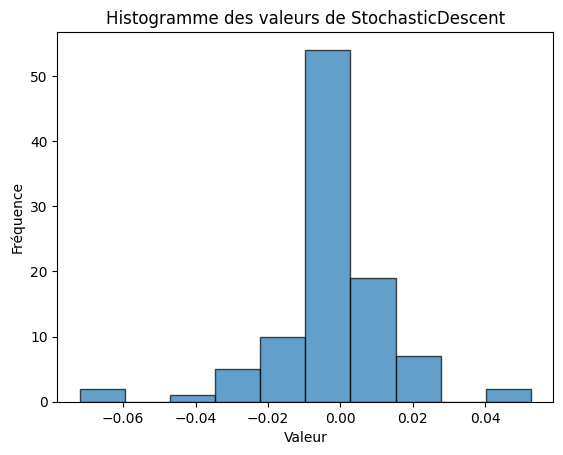

In [29]:
import matplotlib.pyplot as plt

# Vecteur résultat
results = [stochastic_descent(eps=0.001, theta0=np.array([0 for _ in range(n)]), L=function_test, eta=0.01, batch_size = n)[0][0] for _ in range(100)]

# Histogramme
plt.hist(results, bins=10, edgecolor='k', alpha=0.7)
plt.title("Histogramme des valeurs de StochasticDescent")
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.show()


On voit bien apparaitre sur l'histogramme le fait que l'algorithme ne prédise pas toujours la même valeur. Néanmoins, on voit également que la répartition n'est pas uniforme : certaines valeurs sont plus populaires (ici les valeurs proches de 0).

Dimension 2

In [30]:
n=2
function_test = make_random_func2(10000, n)

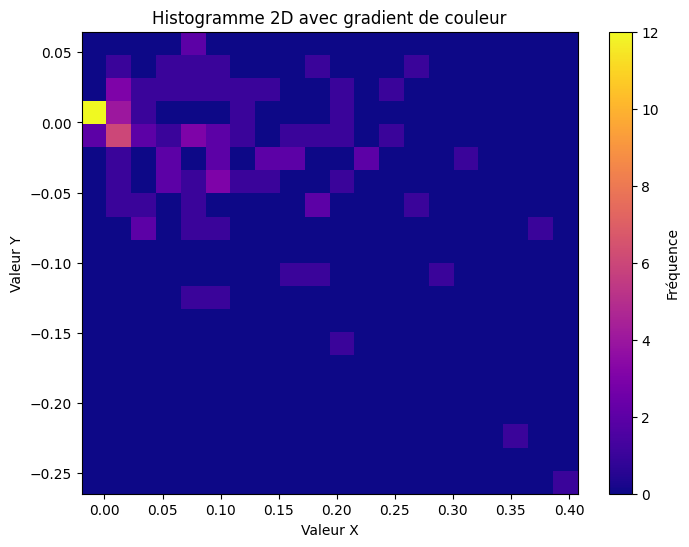

In [31]:

results = np.array([stochastic_descent(eps=0.001, theta0=np.array([0 for _ in range(n)]), L=function_test, eta=0.01, batch_size = n)[0] for _ in range(100)])  # Récupérer les np.array de taille 2

# Separer les deux dimensions
x_vals = results[:, 0] 
y_vals = results[:, 1]

# Creer une figure avec un gradient de densite
plt.figure(figsize=(8, 6))
plt.hist2d(x_vals, y_vals, bins=20, cmap='plasma')  # Histogramme 2D avec gradient de couleur

# Ajouter des éléments de visualisation
plt.colorbar(label="Fréquence")  # Barre de couleur pour indiquer les densités
plt.title("Histogramme 2D avec gradient de couleur")
plt.xlabel("Valeur X")
plt.ylabel("Valeur Y")
plt.show()


Comme pour la dimension 1, on voit également que les résultats de l'algorithme de StochasticGradient ne sont pas distribués de manière uniforme mais que certaines valeurs ressortent plus souvent.

Cette méthode permet donc d'obtenir un intervalle de confiance ou un pavé de confiance pour les dimensions supérieures à 1 mais pas d'obtenir de manière certaine une solution. Elle a l'avantage de ne pas nécessiter de connaitre la hessienne mais seulement le gradient et de permettre de prendre en compte le caractère aléatoire des données.

In the machine learning cmmunity, the optimisation problems may not be convex, they may have saddle point (the hessian is non-invertible so the algorithm is stuck) or be highly stochastic.
The distribution $\mathbb{P}$ may be populated by a very high amount of samples as well.


So stochastic algorithm had to be improved in several ways.
The first good idea came (mostly) from Pr. Nesterov, it is the addition of a "momentum" in the gradient descent to get out of local minima, accelerate the descent, and cross the most dangerous saddle points.

It has now been time and time improved upon, leading to the popular *Adam* algorithm.

It looks as follows:
```
Given two parameters beta_1 and beta_2, and learning rate eta
Start with:
    theta := theta_0
    m := 0 (first moment ~> mean)
    v := 0 (second moment ~> variance)
While no convergence observed:
    Take a (mini/small/full)batch of the data, X
    Set grad_new := gradient_oracle( theta , X )
    Set m_new = beta_1 * m + (1-beta_1) * grad_new
    Set v_new = beta_2 * v + (1-beta_2) * grad_new * grad_new
    Correct biases in moment estimates:
        Set m_hat = m_new / (1-beta_1)
        Set v_hat = v_new / (1-beta_2)
    Set theta_new := theta - eta * m_hat / square_root( v_hat )
```
**Implement this new algorithm for `function6`. Try to explain in your own words what the main ideas of this algorithm are, and comment on the hyper parameters $\beta_1$ and $\beta_2$.**

In [32]:
from projet1 import adam
n=4
function6 = make_random_func2(10000, n)
adam(L=function6, theta_0=np.array([0 for _ in range(n)]), eps=0.1, eta=0.1, beta_1=0.9, beta_2=0.99)

(array([-0.62876314,  0.507293  , -1.28770179,  0.44387573]), 22)

$\beta_1$ et $\beta_2$ permettent de contrôler les variations de $m$ et $v$ qui sont en fait les moments d'ordre 1 et 2 du gradient. Plus $\beta_1$ et $\beta_2$ sont grands, plus le m final dépendra de moins en moins des derniers gradients calculés dans la boucle.